In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar arquivo para um Dataframe 
df_exames = pd.read_csv('./datasets/exames_diabetes.csv')

In [3]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [4]:
# Apresentar as 10 primeira linhas
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [5]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [6]:
# Remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [7]:
df_exames.head(10)

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
5,M,64,93,190,117
6,F,21,70,182,90
7,F,60,101,179,84
8,F,63,83,189,92
9,F,65,78,175,121


In [8]:
# Converter uma variável categorica (genero) em numerica, usando One-Hot Encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')


In [9]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

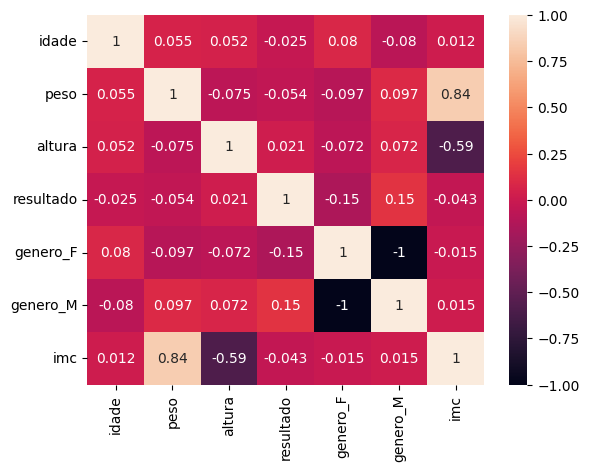

In [17]:
# Apresentar Mapa de CAlor com correlação entre as variáveis
sns.heatmap(df_exames.corr(),vmin=-1, vmax=1, annot=True)

<Axes: >

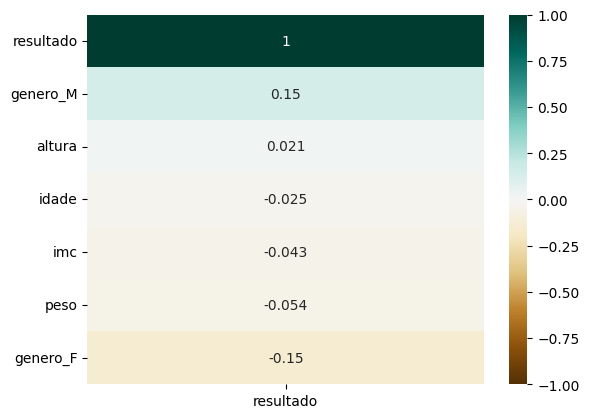

In [18]:
# Mapa de correlação so com a variavel target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


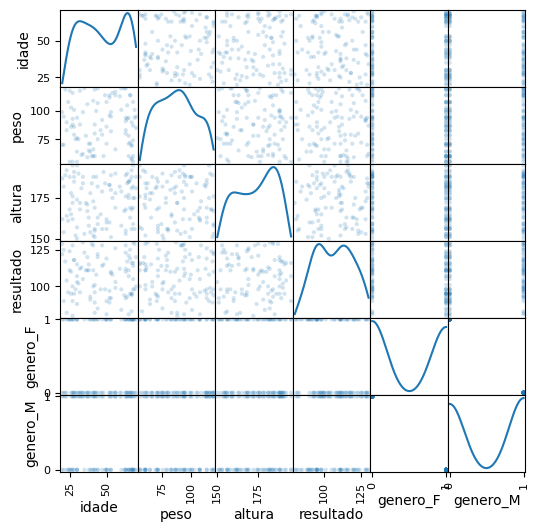

In [12]:
# Plot de Scatter (dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

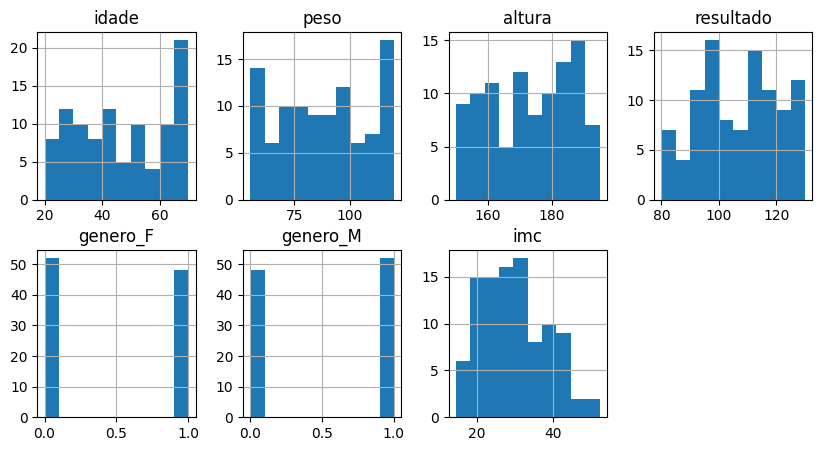

In [19]:
# Histograma de todas as variaveis
df_exames.hist(layout=(2,4), figsize=(10,5))

In [14]:
# Criar uma feature nova
# IMC (Índice de Massa Corporal)
# Imc =  peso / altura ^ 2
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100)**2))


In [15]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [16]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [25]:
dict_regressao = {'tempo_casa': [1, 3, 6, 9, 10, 14 , 18], 'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]}

In [26]:
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

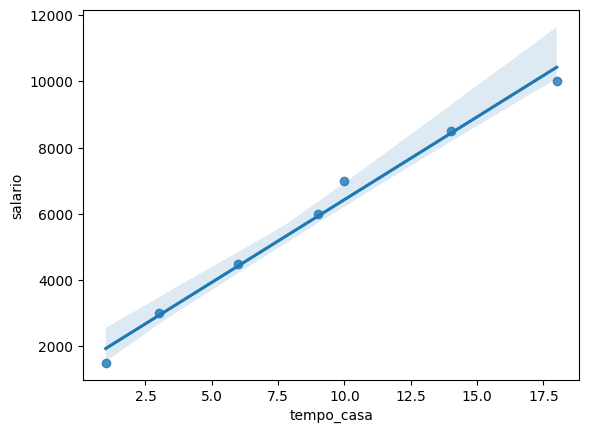

In [27]:
sns.regplot(data=df_regressao_simples, x="tempo_casa", y="salario")

y = ax + b

In [32]:
# Importar biblioteca do sklearn
from sklearn.linear_model import LinearRegression  # para realizar regressão linear
from sklearn.model_selection import train_test_split  # divide arrays ou matrizes em subconjuntos aleatórios de treino e teste
from sklearn.metrics import mean_absolute_error, r2_score  #calcula o erro absoluto médio (MAE), uma métrica de perda de regressão, r2_score: Esta função calcula o R², o coeficiente de determinação, que é uma medida estatística de quão bem as previsões aproximam os alvos reais

In [28]:
# Modelo 1 - Sem IMC
x = df_exames.drop(columns=['imc', 'resultado'])
y = df_exames['resultado']

In [40]:
# Dividir conjunto entre treino e teste 
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size=0.7, random_state=51)

In [50]:
len(x_train)

70

In [43]:
len(x_test)

30

In [45]:
# treinar o algoritmo de Regressão linear - Modelo 1 
model_1 =  LinearRegression().fit(x_train, y_train)

In [46]:
# Gerar Predições do conjunto de testes com base no modelo 1
y_pred = model_1.predict(x_test)

In [47]:
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [48]:
# Equação da reta - Regressão Linear 
# y =  ax + b
model_1.coef_        #  Este atributo contém os coeficientes ( a ) da equação da reta, que correspondem à inclinação da linha. Em outras palavras, eles representam o quanto a variável dependente ( y ) muda para uma unidade de mudança na variável independente ( x )


array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [49]:
model_1.intercept_  # Este atributo representa o termo independente ( b ) na equação da reta. É o valor de ( y ) quando ( x ) é zero, ou seja, onde a linha intercepta o eixo ( y )

94.21133142019856